In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, skew, kurtosis
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [37]:
#configure pandas
pd.set_option('display.max_rows', 50)

In [131]:
main_path = 'C:\\Users\\Sumed\\Desktop\\Final_Sem_Sumedh\\'
df = pd.read_csv(main_path + 'image-data-ePGD-endsem.csv')

In [39]:
#Q1
# Ques on – 1 [15 marks] 
# a. Perform and document all the EDA steps executed on the dataset by you. 
# Irrespec ve of when the EDA steps are implemented (ini al EDA, done to understand the dataset, or 
# subsequent EDA, as you progress through the ques ons), all the EDA steps should be documented and 
# explained at one place. Following is the suggested format for EDA documenta on. ------------------------------------------------ 
#  EDA step 1:  
#  Reason for this step:  
#  Observa on and analysis: 
#  Actions to be taken (if any): 
#  Remarks

In [132]:
display(df)
#  Reason for this step: to check what each row represents 
#  Observa on and analysis: it appears that each row represents the image name, cell number and an indication whether there is wildlife present in this cell.
#  Actions to be taken (if any): none as of now.

,image_filename,cell_number,cell_row,cell_col,label,c1,c2,c3,c4,c5,...,c126,c127,c128,c129,c130,c131,c132,c133,c134,c135
0,IMG_20250705_121136381~2.jpg,13,1,4,1,0.001067,0.011600,0.038667,0.064400,0.356800,...,162.00,0.181895,108.658800,6.479477,890.007871,12778.193100,1091397,3573669.586,3.101389e+06,0.867844
1,CIMG0113.JPG,37,4,4,1,0.000133,0.236800,0.419067,0.112267,0.031467,...,139.25,0.362944,110.399333,7.022868,704.594772,10415.927290,849863,3445633.368,1.838827e+06,0.533669
2,IMG_3416.JPG,20,2,3,0,0.000000,0.001467,0.043333,0.154267,0.243333,...,147.00,0.198979,98.594400,6.613299,1485.853169,11194.963970,959210,3009723.773,8.134175e+06,2.702632
3,CIMG0217.JPG,38,4,5,0,0.000000,0.000000,0.000133,0.192800,0.787067,...,136.00,0.082952,64.242267,5.457998,751.399306,11206.359630,969349,1757998.087,3.877497e+06,2.205632
4,CIMG0063.JPG,18,2,1,0,0.588267,0.035200,0.056800,0.072533,0.081467,...,124.00,1.247159,51.422800,5.486431,1288.086015,7729.182713,424505,4248047.582,5.412598e+06,1.274138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,IMG_3385.JPG,4,0,3,0,0.000000,0.679200,0.309867,0.010800,0.000133,...,71.00,0.175321,107.315067,5.460456,663.827397,5691.293367,488767,1438614.924,3.540091e+06,2.460763
5006,CIMG0428.JPG,47,5,6,0,0.002267,0.020533,0.141333,0.328800,0.290933,...,156.00,0.255065,100.931467,7.096395,2088.868638,11705.490580,997794,3493295.062,1.217322e+07,3.484738
5007,IMG_3747.JPG,21,2,4,0,0.002048,0.023629,0.131065,0.239445,0.373819,...,142.00,0.240803,95.780876,6.873239,1076.900868,9899.371168,771331,2973036.365,3.863130e+06,1.299389
5008,CIMG0210(1).JPG,1,0,0,0,0.035333,0.007333,0.009467,0.947867,0.000000,...,141.00,0.182423,108.578933,4.186644,707.794959,11713.782320,999794,2760972.071,2.547490e+06,0.922679


In [135]:
# check number  of columns and rows in the data
print(df.shape) 
print('\n')

# check number of missing values
print(df.isnull().sum().sum(), "total missing values")
print('\n')

print(df.isnull().sum()) #per column
print('\n')

df_nulls_removed = df.dropna()
print(df_nulls_removed.shape)



rows_per_image = df_nulls_removed.groupby('image_filename').count()
bad = rows_per_image[rows_per_image != 64]
if len(bad):
    print(f'{len(bad)} images without 64 rows.')

images_without_all_data = bad.index.tolist()
display(images_without_all_data)
df_cleansed = df_nulls_removed[~df_nulls_removed['image_filename'].isin(images_without_all_data)]
display(df_cleansed.shape)

#  Reason for this step:  to check if any number of images do not have a cell co-ordinate. futher i am checking if there is data available  on row context for all images or not. if 
#  Observa on and analysis: there are 51 columns with such an error. There are  5 images without full data to analyze. 
#  Actions to be taken (if any): I will now have to check if i drop such images how much of the dataset i can retain. i have dropped 10 rows, meaning that there were 10 rows which had  an issue  with the data. i am still able to retin 5000 images and i am proceeding ahead with the data. i will also drop the images without all the 64 rows in the data.


(5010, 140)


51 total missing values


image_filename    0
cell_number       0
cell_row          0
cell_col          0
label             0
                 ..
c131              0
c132              0
c133              0
c134              0
c135              0
Length: 140, dtype: int64


(5000, 140)
465 images without 64 rows.


['100820081692.jpg',
 '100820081693.jpg',
 '100820081694.jpg',
 '100820081695.jpg',
 '141120142185.jpg',
 '26102010062.jpg',
 '29032008693.jpg',
 '29032008695.jpg',
 '29032008696.jpg',
 '29032008701.jpg',
 'CIMG0001~2.JPG',
 'CIMG0002.JPG',
 'CIMG0005.JPG',
 'CIMG0006.JPG',
 'CIMG0011.JPG',
 'CIMG0012~2.JPG',
 'CIMG0014(1).JPG',
 'CIMG0014.JPG',
 'CIMG0015.JPG',
 'CIMG0017.JPG',
 'CIMG0018.JPG',
 'CIMG0021~2.JPG',
 'CIMG0029.JPG',
 'CIMG0030.JPG',
 'CIMG0034.JPG',
 'CIMG0035.JPG',
 'CIMG0047.JPG',
 'CIMG0054.JPG',
 'CIMG0056.JPG',
 'CIMG0058.JPG',
 'CIMG0060.JPG',
 'CIMG0062.JPG',
 'CIMG0063(1).JPG',
 'CIMG0063.JPG',
 'CIMG0064(1).JPG',
 'CIMG0064(2).JPG',
 'CIMG0064(3).JPG',
 'CIMG0064.JPG',
 'CIMG0064~2.JPG',
 'CIMG0065.JPG',
 'CIMG0067(1).JPG',
 'CIMG0067(2).JPG',
 'CIMG0067.JPG',
 'CIMG0068(1).JPG',
 'CIMG0073.JPG',
 'CIMG0074.JPG',
 'CIMG0076.JPG',
 'CIMG0077.JPG',
 'CIMG0078.JPG',
 'CIMG0079(1).JPG',
 'CIMG0079.JPG',
 'CIMG0079~2.JPG',
 'CIMG0079~3.JPG',
 'CIMG0080(1).JPG',
 'CIM

(0, 140)

In [ ]:
df_cleansed.dropna

(5010, 140)


In [ ]:
# Count number of rows per image
rows_per_image = df_nulls_removed.groupby('image_filename').()

# Find images without 64 rows
bad = rows_per_image[rows_per_image != 64]

if len(bad):
    print(f"{len(bad)} images without 64 rows.")

# Get images that DO have exactly 64 rows
images_with_all_data = rows_per_image[rows_per_image == 64].index.tolist()

# Filter dataframe
df_cleansed = df_nulls_removed[df_nulls_removed["image_filename"].isin(images_with_all_data)].reset_index(drop=True)

print(df_cleansed.shape)

465 images without 64 rows.
(0, 140)


In [89]:
display(rows_per_image)

,cell_number,cell_row,cell_col,label,c1,c2,c3,c4,c5,c6,...,c126,c127,c128,c129,c130,c131,c132,c133,c134,c135
image_filename,,,,,,,,,,,,,,,,,,,,,
100820081692.jpg,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
100820081693.jpg,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
100820081694.jpg,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
100820081695.jpg,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
141120142185.jpg,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p4.jpg,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
p6.jpg,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
p7.jpg,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [ ]:
# find out the level of measurement
def detect_level_of_measurement(series):
    if series.dtype == 'object' or series.dtype.name == 'category':
        # Check if ordinal category
        if hasattr(series.dtype, 'ordered') and series.dtype.ordered:
            return "Ordinal"
        return "Nominal"

    # If numeric
    if pd.api.types.is_numeric_dtype(series):
        unique_vals = series.dropna().unique()
        # Only two unique values => probably nominal (binary flag)
        if len(unique_vals) == 2:
            return "Nominal (binary)"
        # Check if values can be considered ratio (non-negative + meaningful zero)
        if (series.dropna() >= 0).all():
            return "Ratio"
        # Otherwise numeric but negative allowed → often interval scale
        return "Interval"
    # If datetime
    if pd.api.types.is_datetime64_any_dtype(series):
        return "Interval (datetime)"
    # Fallback
    return "Unknown"

level_map = {}

for col in df_nulls_removed.columns:
    level_map[col] = detect_level_of_measurement(df_nulls_removed[col])

levels_df = pd.DataFrame.from_dict(level_map, orient='index', columns=['Level of Measurement'])
display(levels_df)

levels_df.to_csv(main_path +  'level_of_measurement.csv')
#  Reason for this step:  to check if there is any categorical dimension in the data, we will need to consider the 
#  Observa on and analysis: There are 2 categorical variables here, image_filename and label which are not being considered for ML, hence there isn't any issue with the level of measurement in the data. With the "label" column i can see it is also an indicator and that too in a binary format.
#  Actions to be taken (if any): no action has  been taken.

,Level of Measurement
image_filename,Nominal
cell_number,Ratio
cell_row,Ratio
cell_col,Ratio
label,Nominal (binary)
...,...
c131,Ratio
c132,Ratio
c133,Ratio
c134,Ratio


In [ ]:
#check if we have enough wildlife present in the photos

nominal_column = df_nulls_removed['label']
display(nominal_column.unique())

counts = {k: int(v) for k, v in nominal_column.value_counts().items()}
print(counts)

percentages = {k: float(v * 100 / len(df)) 
               for k, v in nominal_column.value_counts().items()}
print(percentages)


#  Reason for this step:  to check if we have enough images with wildlife  content in them. the label represents if we have wildlife in them or not.
#  Observa on and analysis: it appears that 66.48% of the images have wildlife while the remaining have noise in them. total images with wildlife - 3331

array([1, 0])

{0: 3331, 1: 1669}
{0: 66.48702594810379, 1: 33.31337325349301}


Selected features: ['c1', 'c2', 'c3', 'c4', 'c5']


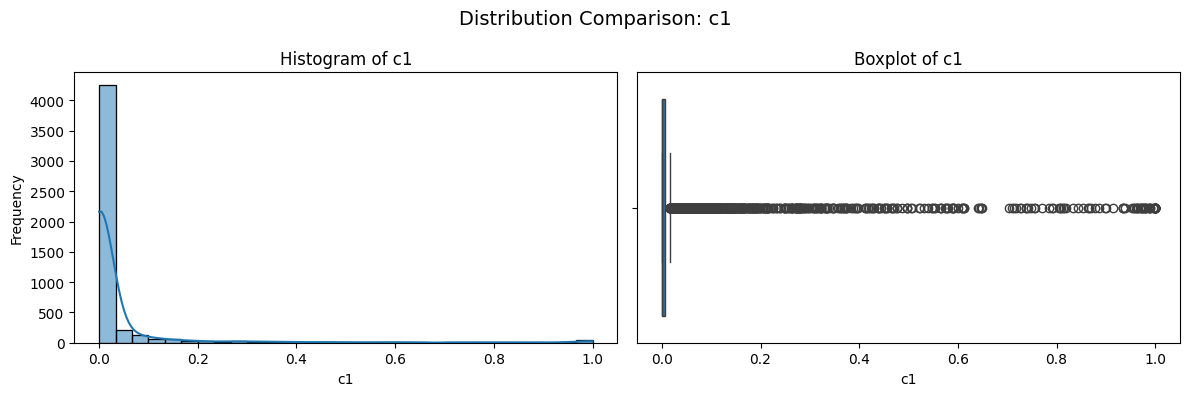

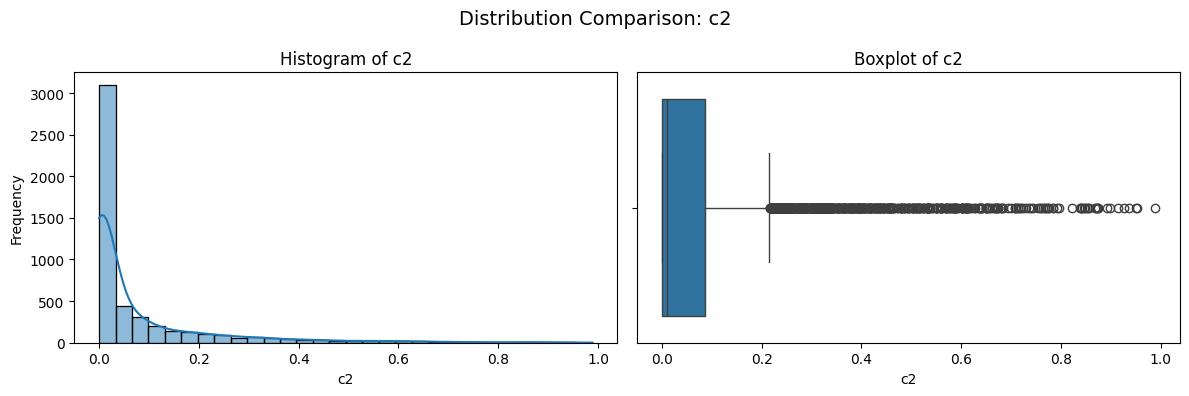

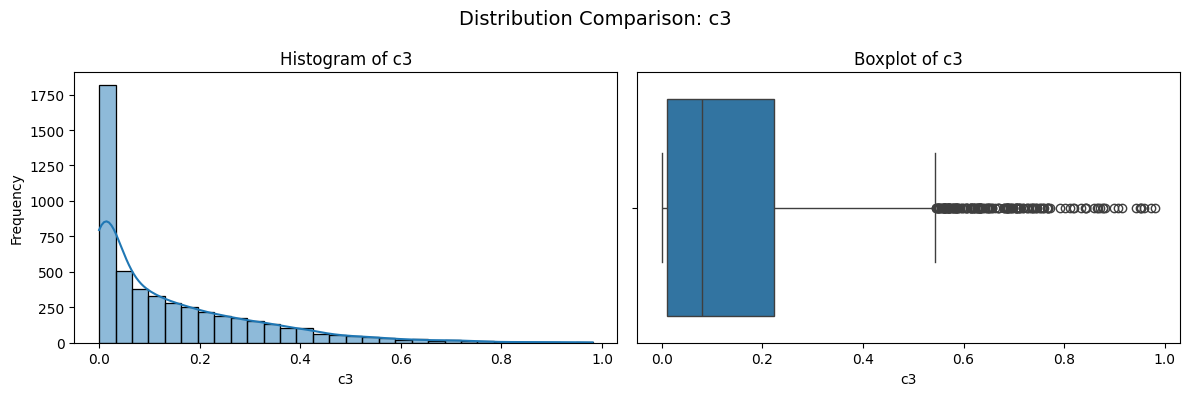

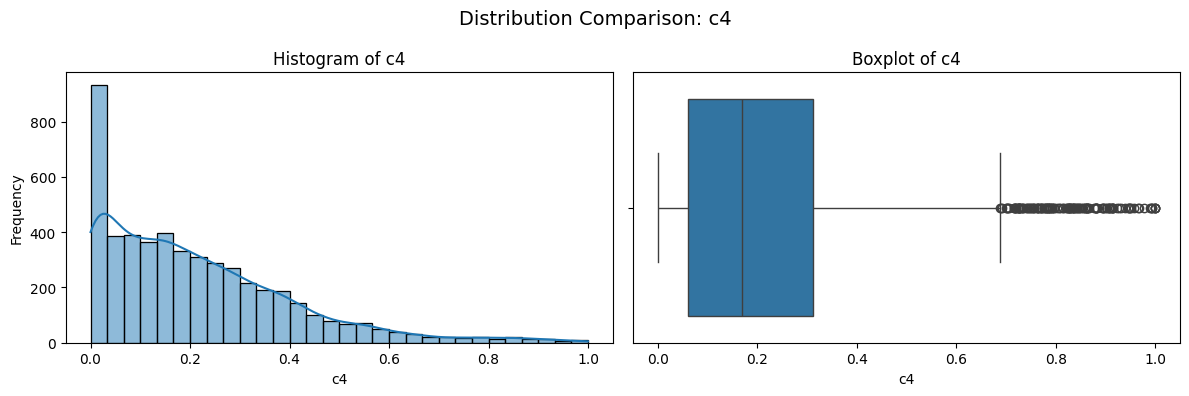

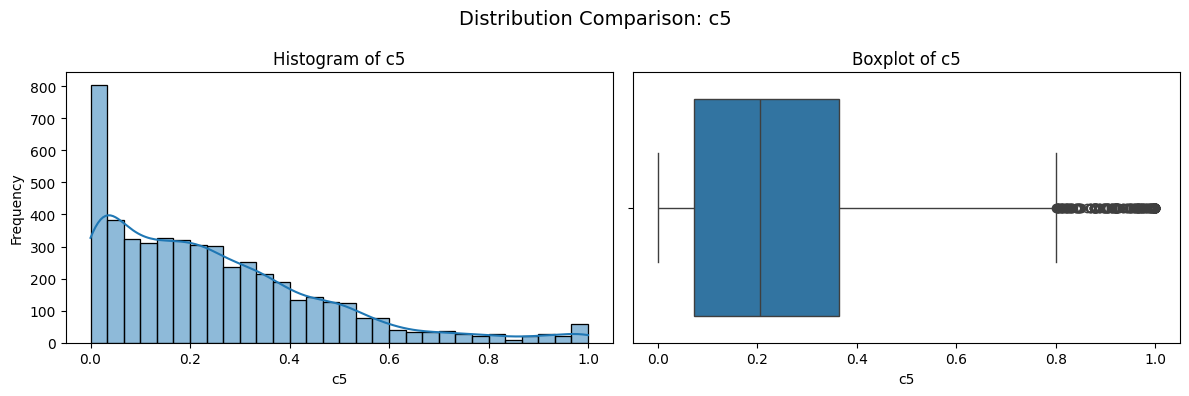

In [ ]:
# Q2 part a

# histograms and box plots are interrelated but they are not truly equivalent, as histograms display the total shape of the distribution in consideration while boxplots show information only about the five number summary, meaning - Minimum, Q1, Median, Q3 and Max. Additionally Box plots also show the mean(if configured) and outliers in the data which is a bit difficult to point out in the histogram. histogram shows the frequency of the values  across bins while box plot
# 
non_feature_cols = ['image_name'
                   ,'image_filename'
                   ,'cell_number'
                   ,'cell_row'
                   ,'cell_col'
                   ,'label'
]

numeric_cols = [
    c for c in df_nulls_removed.columns
    if c not in non_feature_cols
    and pd.api.types.is_numeric_dtype(df_nulls_removed[c])
]

# Select first 5 numeric features for comparison
selected_features = numeric_cols[:5]
print("Selected features:", selected_features)

for col in selected_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df_nulls_removed[col].dropna(), bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    sns.boxplot(x=df_nulls_removed[col].dropna(), orient="h", ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    axes[1].set_xlabel(col)

    plt.suptitle(f"Distribution Comparison: {col}", fontsize=14)
    plt.tight_layout()
    plt.show()



# histograms and box plots are interrelated but they are not truly equivalent, as histograms display the total shape of the distribution in consideration while boxplots show information only about the five number summary, meaning - Minimum, Q1, Median, Q3 and Max. Additionally Box plots also show the mean(if configured) and outliers in the data which is a bit difficult to point out in the histogram. histogram shows the frequency of the values  across bins while box plot
# Clealy in the images shown below we can see that histograms shape show the distribution but fail to show the outliers  which are clearly seen in the boxplots. 


Selected skewed feature: c123
Original skewness: 38.064092391435246
Skewness after log transform: 3.8770827940157075
Box-Cox lambda: -0.6919369043540861
Skewness after Box-Cox: -0.09730984211562226


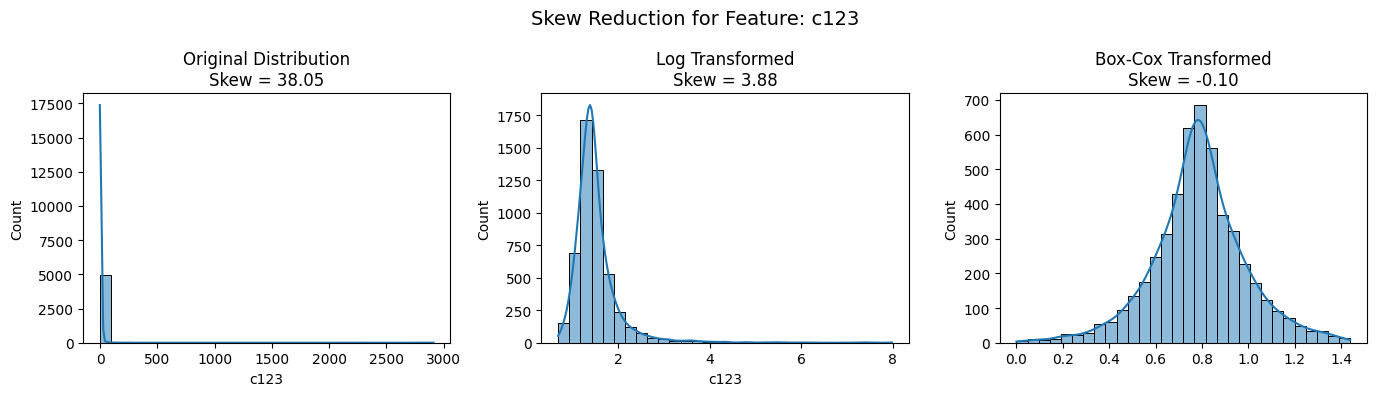

In [ ]:
# Q2 part b

skew_values = df_nulls_removed[numeric_cols].skew().sort_values(ascending=False)
selected_feature = skew_values.index[0]     # most skewed feature
print("Selected skewed feature:", selected_feature)
print("Original skewness:", skew_values.iloc[0])

x = df_nulls_removed[selected_feature].dropna()

if (x <= 0).any():
    x_log = np.log1p(x - x.min() + 1)
else:
    x_log = np.log1p(x)

print("Skewness after log transform:", skew(x_log))

x_shifted = x - x.min() + 1
x_boxcox, lam = boxcox(x_shifted)
print("Box-Cox lambda:", lam)
print("Skewness after Box-Cox:", skew(x_boxcox))


plt.figure(figsize=(14, 4))

# Original
plt.subplot(1, 3, 1)
sns.histplot(x, bins=30, kde=True)
plt.title(f"Original Distribution\nSkew = {skew(x):.2f}")

# Log transform
plt.subplot(1, 3, 2)
sns.histplot(x_log, bins=30, kde=True)
plt.title(f"Log Transformed\nSkew = {skew(x_log):.2f}")

# Box-Cox transform
plt.subplot(1, 3, 3)
sns.histplot(x_boxcox, bins=30, kde=True)
plt.title(f"Box-Cox Transformed\nSkew = {skew(x_boxcox):.2f}")

plt.suptitle(f"Skew Reduction for Feature: {selected_feature}", fontsize=14)
plt.tight_layout()
plt.show()


#the dimension c123 clearly shows that this feature is right skewed meaning there is a large tail on the right side of the dimension. By looking at the earlier historgram plots we can also choose C1 or C2
#the log transformation basically reduces very large  values to small values by taking a log(value). This somewhat brought our feature distribution to normal like distribution and reduced the skewness
#further you can see that the box-cox transformation has  brought the distrubution to almost perfect  normal like distribution. It does so by taking in the best of the  available methods like log/square-root etc. the boxcox function intelligently decides  what to use.
#boxcox uses lambda to decide what function to use
# lambda = 1 → no transformation
# Data stays as it is.
# lambda = 0 → natural logarithm
# Same as log transformation.
# lambda = 0.5 → square-root transformation
# lambda = -1 → reciprocal (1/x)

Features closest to normal:
   feature      skew  kurtosis
24     c25 -0.309041  0.524048
27     c28 -0.200390  0.716885
37     c38 -0.299766  0.717459
41     c42 -0.408080  0.893353
45     c46 -0.018475  0.224675

Plotting histograms for: ['c25', 'c28', 'c38', 'c42', 'c46']


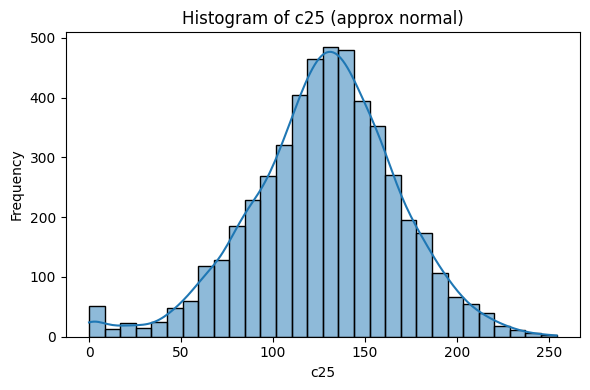

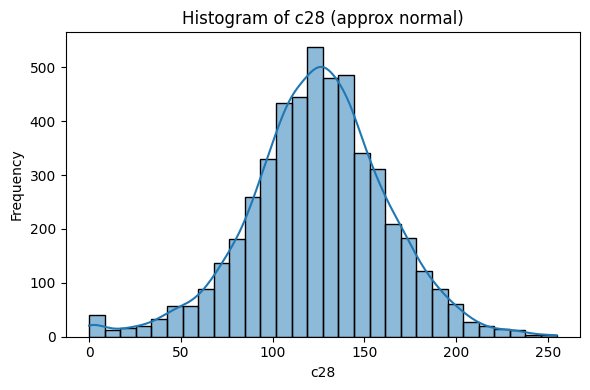

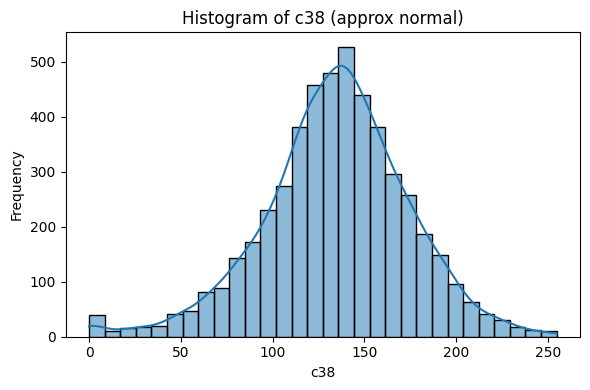

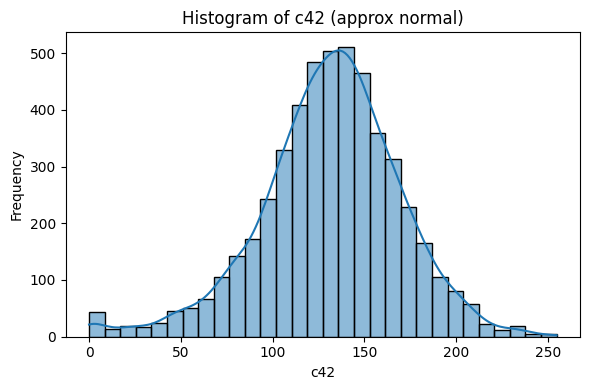

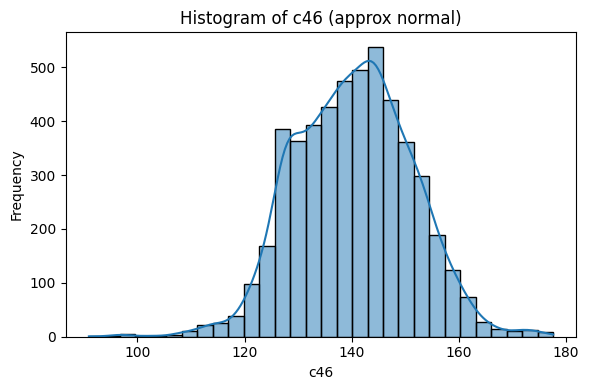

In [ ]:
# Q2 part c

non_feature_cols = [
    'image_name','image_filename',
    'cell_number','cell_row','cell_col','label'
]

numeric_cols = [
    c for c in df_nulls_removed.columns
    if c not in non_feature_cols and pd.api.types.is_numeric_dtype(df_nulls_removed[c])
]

stats = []
for c in numeric_cols:
    x = df_nulls_removed[c].dropna()
    stats.append((c, skew(x), kurtosis(x, fisher=True)))

stats_df = pd.DataFrame(stats, columns=["feature","skew","kurtosis"])

normal_like = stats_df[
    (stats_df["skew"].abs() <= 0.5) &
    (stats_df["kurtosis"].abs() <= 1)
]

print("Features closest to normal:")
print(normal_like.head())

selected = normal_like["feature"].head(5).tolist()
print("\nPlotting histograms for:", selected)

for col in selected:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Histogram of {col} (approx normal)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()




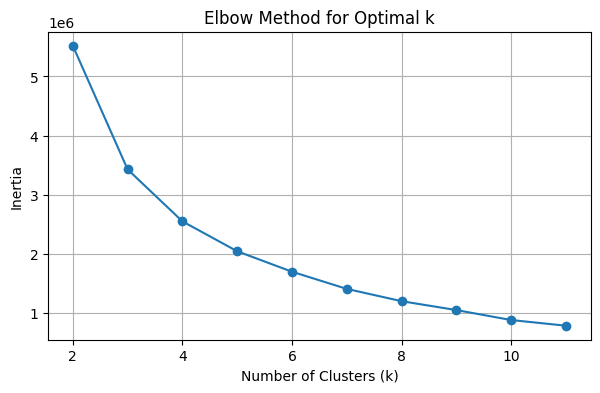

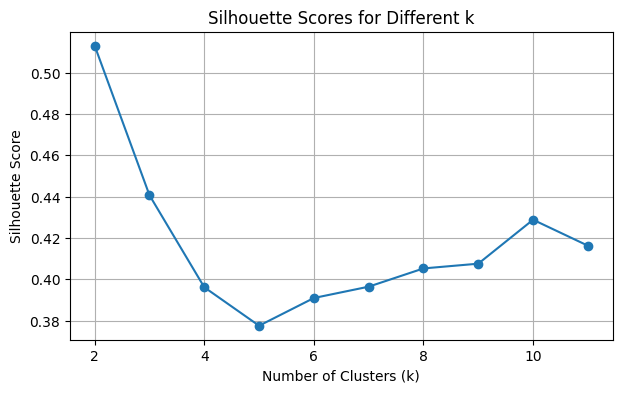

Best k based on silhouette score: 2


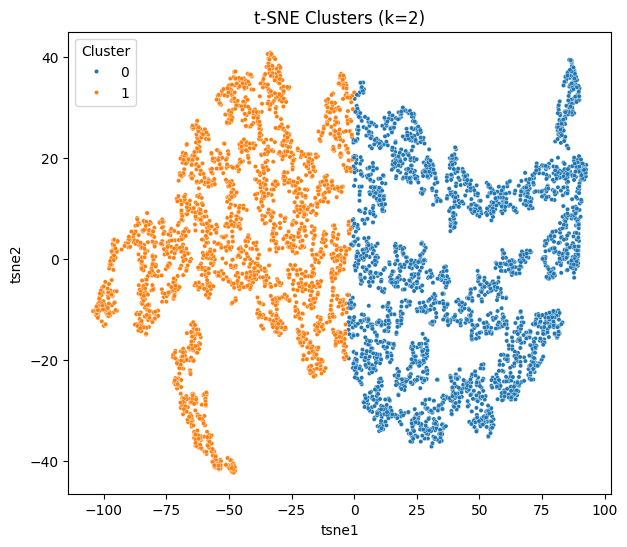

In [ ]:
#Q2 part d
X = df_nulls_removed[numeric_cols].fillna(0)

tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, 
            max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])


inertias = []
silhouettes = []
K = range(2, 12)   # Try clusters from 2 to 11

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_tsne)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_tsne, labels))


plt.figure(figsize=(7,4))
plt.plot(K, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


plt.figure(figsize=(7,4))
plt.plot(K, silhouettes, marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


best_k = K[np.argmax(silhouettes)]
print("Best k based on silhouette score:", best_k)


kmeans_final = KMeans(n_clusters=best_k, random_state=42)
df_tsne['cluster'] = kmeans_final.fit_predict(df_tsne)


plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df_tsne, 
    x='tsne1', y='tsne2', 
    hue='cluster',
    palette='tab10', s=10
)
plt.title(f"t-SNE Clusters (k={best_k})")
plt.legend(title="Cluster")
plt.show()



#generally it  is recommended that we do a PCA before reaching out to perform t-SNE plots.
# the elbow method and silhouette score methods  tells us the optimum number of clusters that we should be using. additionally we can use david bouldin method.
# using this method we need to identify the sharp bend, the value at sharp bend tells  us the number of optimal clusters.we call it n for this experiment.
# by looking at the silhouette score we need to find out the peak value. the peak value and elbow value compared gives us the 2 as the number of optimal clusters.

Accuracy: 0.745
ROC-AUC: 0.760007013001025
Confusion Matrix:
 [[556 110]
 [145 189]]


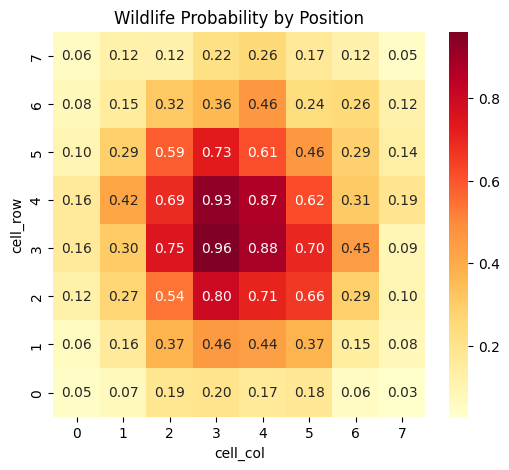

In [ ]:
#Q2 part e

X = df_nulls_removed[["cell_row", "cell_col"]]
y = df_nulls_removed["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("ROC-AUC:", auc)
print("Confusion Matrix:\n", cm)

heat = df.groupby(['cell_row', 'cell_col'])['label'].mean().unstack()
plt.figure(figsize=(6,5))
sns.heatmap(heat, cmap="YlOrRd", annot=True, fmt=".2f")
plt.title("Wildlife Probability by Position")
plt.gca().invert_yaxis()
plt.show()

#for this problem we need to take cell grid location into consideration. cell_row and cell_columns become our independent variables  while lable column becomes our dependent variable. using this data we train the models KNN and DecisionTree. if the the lable predicted are generally in the middle the heatmap of the it means that the photographers consider animals to be in the middle of the photograph generally.
# we take H0 : the photographer considers animmals in the centre of the images generally
# H1 : the photographer does not consider animmals in the centre of the images generally
# We  fail to reject the null hypothesis as per the heatmap.


# we take H0 : the value of accuracy and roc-auc is less than 0.5 and 0.5 respectively
# H1 : value of accuracy and roc-auc is more than 0.5 and 0.5 respectively
# We reject the null hypothesis. there is a central pattern, the classifier isn't predicting anything by chance. the roc-auc values and the confusion matrix supports my evaluation